In [1]:
# those modules are almost always imported when working with model data
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr # the major tool to work with NetCDF data!

import netCDF4
import os
from glob import glob
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
import pickle as pickle

In [2]:
basedir = '/Users/dporter/Documents/data_local/'
datadir = 'Antarctica/Geophysical/Scheinert_2016/'
suffix = '.nc'

pattern = os.path.join(basedir, datadir, 'antgg*' + suffix)
filenames = sorted(glob(pattern))  # , key=alphanum_key)
print filenames

nc_fid = netCDF4.Dataset(filenames[0], 'r')
# nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)
nc_vars = [var for var in nc_fid.variables]
nc_dims = [dim for dim in nc_fid.dimensions]
# print nc_vars
# print nc_dims

for vnum, var in enumerate(nc_vars, start=0):
    if var not in nc_dims:
        ###
#         print nc_fid.variables[var].dimensions
        try:
            globals()[var] = nc_fid.variables[var][:]#.flatten()
            print 'Found %i %s records in %s' % (globals()[var].size, str(var), str(filenames[0]))
        except:
            print 'No %s found in file.' % (str(var))
            globals()[var] = np.full([333, ], np.nan)
            # print 'Original shape of %s: %s' % (nc_vars[vnum], globals()[var].shape)

['/Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc']
Found 444889 longitude records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 latitude records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 ellipsoidal_height records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 orthometric_height records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 free_air_anomaly records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 accuracy_measure records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc
Found 444889 bouguer_anomaly records in /Users/dporter/Documents/data_local/Antarctica/Geophysical/Scheinert_2016/antgg2015.nc


In [3]:
print type(np.array(ellipsoidal_height))
print len(ellipsoidal_height)
print ellipsoidal_height[:]
print type(latitude)
# plt.plot(ellipsoidal_height)

<type 'numpy.ndarray'>
667
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]
<type 'numpy.ndarray'>


In [4]:
# Make an empty 'dictionary'... place the 3 grids in it.
FAG = {}
FAG['lats']=latitude
FAG['lons']=longitude
FAG['fag']=np.array(free_air_anomaly)
# Save (i.e. pickle) the data for later use
# This saves the variable TOPO (with all its contents) into the file: topo.p
# pickle.dump(FAG, open('antgg2015_fag.p','wb'))
np.ma.dump(FAG, open('antgg2015_fag.p','wb'))
FAG

{'fag': array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ..., 
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]]),
 'lats': array([[-48.49868444, -48.5558271 , -48.61290439, ..., -48.61290439,
         -48.5558271 , -48.49868444],
        [-48.5558271 , -48.61307673, -48.67026115, ..., -48.67026115,
         -48.61307673, -48.5558271 ],
        [-48.61290439, -48.67026115, -48.72755283, ..., -48.72755283,
         -48.67026115, -48.61290439],
        ..., 
        [-48.61290439, -48.67026115, -48.72755283, ..., -48.72755283,
         -48.67026115, -48.61290439],
        [-48.5558271 , -48.61307673, -48.67026115, ..., -48.67026115,
         -48.61307673, -48.5558271 ],
        [-48.49868444, -48.5558271 , 

In [5]:
# Make an empty 'dictionary'... place the 3 grids in it.
BOU = {}
BOU['lats']=latitude
BOU['lons']=longitude
BOU['bou']=np.array(bouguer_anomaly)
BOU['ell']=np.array(ellipsoidal_height)
# Save (i.e. pickle) the data for later use
# This saves the variable TOPO (with all its contents) into the file: topo.p
pickle.dump(BOU, open('antgg2015_bouger.p','wb'))
BOU['ell']

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ..., 
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

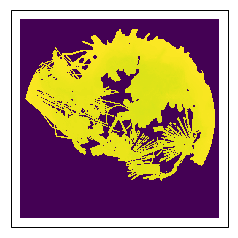

In [6]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.SouthPolarStereo())
# ax.set_extent([-180, 180, -90, -60])
plt.pcolormesh(longitude, latitude, BOU['bou'], transform=ccrs.PlateCarree())
# ax.coastlines()
plt.show()

## XARRAY

In [7]:
ds = xr.open_dataset(filenames[0])
ds


<xarray.Dataset>
Dimensions:             (x: 667, y: 667)
Coordinates:
  * x                   (x) int32 -3330 -3320 -3310 -3300 -3290 -3280 -3270 ...
  * y                   (y) int32 3330 3320 3310 3300 3290 3280 3270 3260 ...
Data variables:
    longitude           (y, x) float64 -45.0 -44.91 -44.83 -44.74 -44.65 ...
    latitude            (y, x) float64 -48.5 -48.56 -48.61 -48.67 -48.73 ...
    crs                 int32 -2147483647
    ellipsoidal_height  (y, x) float64 nan nan nan nan nan nan nan nan nan ...
    orthometric_height  (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    free_air_anomaly    (y, x) float64 nan nan nan nan nan nan nan nan nan ...
    accuracy_measure    (y, x) float64 nan nan nan nan nan nan nan nan nan ...
    bouguer_anomaly     (y, x) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:  CF-1.6
    title:        Antarctic Gravity Grid
    institution:  TU Dresden
    source:       http://dx.doi.org/10.1594/PANGAEA.84816

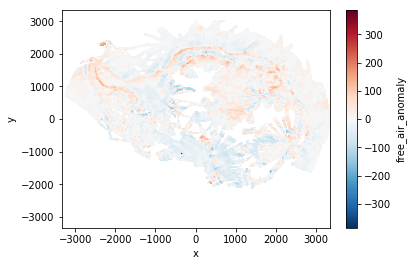

In [8]:
ds['free_air_anomaly'].plot()

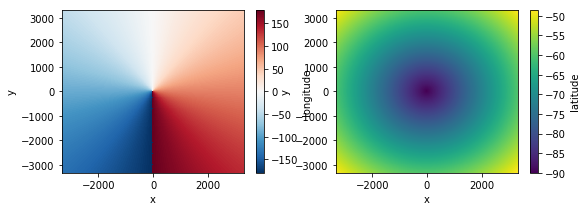

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,3))
ds.longitude.plot(ax=ax1);
ds.latitude.plot(ax=ax2);

In [10]:
# plt.figure(figsize=(7,2));
# ax = plt.axes(projection=ccrs.PlateCarree());
# ds['free_air_anomaly'].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
#                           x='longitude', y='latitude', add_colorbar=False);
# ax.coastlines();
# plt.tight_layout();

In [11]:
import pandas as pd
from glob import glob
def importOIBgrav(basedir, timedir):
    # datadir = 'IGGRV1B/temp'
    # infile = 'IGGRV1B_20091104_13100500_V016'
    # infile = 'IGGRV1B_20091031_11020500_V016'
    # infile = 'IGGRV1B_20091116_15124500_V016'
    suffix = '.txt'
    pattern = os.path.join(basedir, timedir, 'IGGRV1B_20161114_11243000_V017*' + suffix)
    infile = sorted(glob(pattern))  # , key=alphanum_key)

    ### Read ascii file as csv
    # metadata ends on line 69, column names on line 70
    headers = (
        'LAT', 'LONG', 'DATE', 'DOY', 'TIME', 'FLT', 'PSX', 'PSY', 'WGSHGT', 'FX', 'FY', 'FZ', 'EOTGRAV', 'FACOR',
        'INTCOR',
        'FAG070', 'FAG100', 'FAG140', 'FLTENVIRO')
    # print "Reading gravity file: %s" % infile[0] + suffix %TODO why did I think this would be a list?
    print "Reading gravity file: %s" % infile[0] + suffix
    df = pd.read_csv(infile[0], delimiter=r"\s+", header=None, names=headers, skiprows=70)
    # headers = df.columns[1:df.shape[1]]
    # df.rename(columns=dict(zip(df.columns,headers)), inplace=True)
    # df.rename(columns={'LONG': 'LON'}, inplace=True)
    # df['ENVIRO'] = df.columns[[19]]
    # df.drop(df.columns['FLTENVIRO'],axis=1,inplace=True)

    ### do some DATETIME operations
    df['DATETIME'] = (df.DATE * 1e5) + df.TIME
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
    df['UNIX'] = df['DATE'].astype(np.int64) // 10 ** 9
    df['UNIX'] = df['UNIX'] + df['TIME']
    df['iunix'] = pd.to_datetime(df['UNIX'] * 10 ** 3, unit='ms')
    df.drop(['DATETIME'], axis=1, inplace=True)
    df = df.set_index('iunix')
    return df

basedir = '/Users/dporter/Documents/data_local/Antarctica/OIB/'
datadir = 'IGGRV1B'
timedir = 2016
grav = importOIBgrav(os.path.join(basedir, datadir), str(timedir))


Reading gravity file: /Users/dporter/Documents/data_local/Antarctica/OIB/IGGRV1B/2016/IGGRV1B_20161114_11243000_V017.txt.txt


In [12]:
grav.head()

,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,FX,FY,FZ,EOTGRAV,FACOR,INTCOR,FAG070,FAG100,FAG140,FLTENVIRO,UNIX
iunix,,,,,,,,,,,,,,,,,,,,
2016-11-14 11:24:30.000,-53.004590,-70.845986,2016-11-14,319,41070.0,621,-3929452.26,1364844.81,50.57,5.01,-15.79,981296.93,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09
2016-11-14 11:24:30.500,-53.004590,-70.845986,2016-11-14,319,41070.5,621,-3929452.26,1364844.81,50.57,4.52,-15.33,981297.13,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09
2016-11-14 11:24:31.000,-53.004590,-70.845985,2016-11-14,319,41071.0,621,-3929452.27,1364844.82,50.56,3.46,-14.49,981297.14,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09
2016-11-14 11:24:31.500,-53.004590,-70.845985,2016-11-14,319,41071.5,621,-3929452.27,1364844.83,50.55,2.05,-13.60,981296.95,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09
2016-11-14 11:24:32.000,-53.004589,-70.845985,2016-11-14,319,41072.0,621,-3929452.28,1364844.85,50.54,0.73,-13.01,981296.61,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09


In [52]:
def get_closest_MAR_cell(file_for_latlon, lat, lon):
    """
    SSIA
    :param file_for_latlon:
    :param lat:
    :param lon:
    :return:
    """
    LAT = file_for_latlon['latitude'][:]
    LON = file_for_latlon['longitude'][:]
#     print(lat,lon)
    a = abs(LON - lon) + abs(LAT - lat)
    iii, jjj = np.unravel_index(a.argmin(), a.shape)
    return iii, jjj

In [52]:
grav['test'] =  np.nan
test = np.full([grav.shape[0], ], np.nan)
lat_sample = np.full([grav.shape[0], ], np.nan)
lon_sample = np.full([grav.shape[0], ], np.nan)

for i in range(0, grav.shape[0], 50):
# for i in range(0, 30000, 50):
    ii, jj = get_closest_MAR_cell(ds, grav['LAT'][i], grav['LONG'][i])
#     print('ii: {}\njj: {}'.format(ii, jj))
    lat_sample[i/50] = ds['latitude'][ii,jj].values
    lon_sample[i/50] = ds['longitude'][ii,jj].values
#     print(lat_sample[i])
#     test[i] = ds['bouguer_anomaly'].isel(x=jj, y=ii).values
    grav['test'].iloc[i] = ds['ellipsoidal_height'][ii, jj].values
#     print(test[i])

#     print(ds['latitude'].isel(x=jj, y=ii).values.flatten()[0], ds['longitude'].isel(x=jj, y=ii).values)

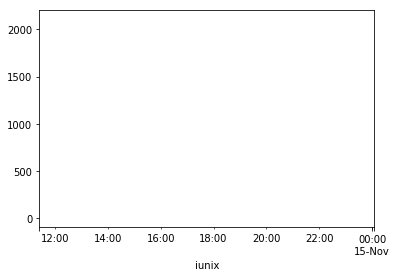

In [53]:
# plt.plot(test)
grav['test'].plot()

In [55]:
grav['test'].describe()

count    1246.000000
mean      767.011717
std       678.367487
min         6.600000
25%        27.900000
50%       771.200000
75%      1345.025000
max      2103.600000
Name: test, dtype: float64

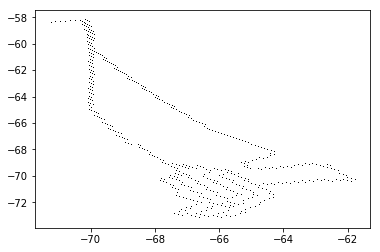

In [61]:
plt.plot(lon_sample, lat_sample, 'k,')

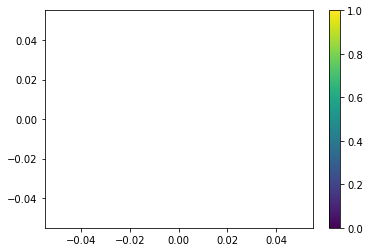

In [59]:
plt.scatter(lon_sample, lat_sample, c=grav['test'], marker='s')
plt.colorbar()

In [17]:
np.nanmin(lat_sample)

-73.183900064300005

In [18]:
ds.latitude.shape

(667, 667)

In [48]:
# ds.sel(latitude=-79)

In [49]:
np.sqrt(841)

29.0

## IBCSO

In [20]:
# from osgeo import gdal

# basedir = '/Users/dporter/Documents/'
# datadir = 'Research/Projects/Quantarctica3/TerrainModels/IBCSO'
# suffix = '.tif'
# pattern = os.path.join(basedir, datadir, 'ibcso_v1_sid_*' + suffix)
# filenames = sorted(glob(pattern))  # , key=alphanum_key)
# print filenames
# gtif = gdal.Open(filenames[0])

basedir = '/Users/dporter/Documents/'
datadir = 'Research/Projects/Quantarctica3/TerrainModels/IBCSO'
suffix = '.tif'
pattern = os.path.join(basedir, datadir, 'ibcso_v1_sid_*' + suffix)
filenames = sorted(glob(pattern))  # , key=alphanum_key)
print filenames
ds = xr.open_dataset(filenames[0])

ImportError: dlopen(/Users/dporter/anaconda2/lib/python2.7/site-packages/osgeo/_gdal.so, 2): Library not loaded: @rpath/libpoppler.71.dylib
  Referenced from: /Users/dporter/anaconda2/lib/libgdal.20.dylib
  Reason: image not found

In [172]:
basedir = '/Users/dporter/Documents/data_local/'
datadir = 'Antarctica/DEM'
suffix = '.nc'
pattern = os.path.join(basedir, datadir, 'RTopo-2.0.1_1min_aux*' + suffix)
filenames = sorted(glob(pattern))  # , key=alphanum_key)
print filenames
rtopo2 = xr.open_dataset(filenames[0])
rtopo2

['/Users/dporter/Documents/data_local/Antarctica/DEM/RTopo-2.0.1_1min_aux.nc']


<xarray.Dataset>
Dimensions:      (latdim: 10801, londim: 21601)
Coordinates:
    lon          (londim) float32 -180.0 -179.983 -179.967 -179.95 -179.933 ...
    lat          (latdim) float32 -90.0 -89.9833 -89.9667 -89.95 -89.9333 ...
Dimensions without coordinates: latdim, londim
Data variables:
    sourcebathy  (latdim, londim) int8 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 ...
    sourcedraft  (latdim, londim) int8 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 ...
    amask        (latdim, londim) int8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    Title:        RTopo-2 global topography data set
    Author:       Janin Schaffer and Ralph Timmermann
    Institution:  Alfred Wegener Institute, Helmholtz Centre for Polar and Ma...
    Source:       Compilation of several original or gridded data sets
    References:   Schaffer, J., R. Timmermann, J.E. Arndt, S.S. Kristensen C....
    Version:      2.0
    Comment:      Use ncview -no_auto_overlay for a simple and efficient data...

In [177]:
def get_closest_RTOPO_cell(file_for_latlon, lat, lon):
    """
    SSIA
    :param file_for_latlon:
    :param lat:
    :param lon:
    :return:
    """
    LAT = file_for_latlon['lat'][:]
    LON = file_for_latlon['lon'][:]
#     print(lat,lon)
    a = abs(LON - lon) + abs(LAT - lat)
    iii, jjj = np.unravel_index(a.argmin(), a.shape)
    return iii, jjj

In [187]:
import time
start_sample = time.time()

grav['test3'] =  np.nan
# test2 = np.full([grav.shape[0], ], np.nan)
lat_sample = np.full([grav.shape[0], ], np.nan)
lon_sample = np.full([grav.shape[0], ], np.nan)
# admap_sub = admap[grav['LONG'].max()+360 > admap['lon']+360][grav['LONG'].min()+360 < admap['lon']+360][grav['LAT'].max() > admap['lat']][grav['LAT'].min() < admap['lat']].describe()


# for i in range(0, grav.shape[0], 50):
# # for i in range(0, 30000, 50):
#     ii, jj = get_closest_RTOPO_cell(rtopo2, grav['LAT'][i], grav['LONG'][i])   
# #     ii = get_closest_ADMAP_cell(admap, grav['LAT'][i], grav['LONG'][i])
# #     ii = (abs(rtopo2['lon'][:] - grav['LONG'][i]) + abs(rtopo2['lat'][:] - grav['LAT'][i])).argmin()
# #     print(ii)
# #     print('ii: {}\njj: {}'.format(ii, jj))
#     lat_sample[i/50] = admap['lat'][ii]
#     lon_sample[i/50] = admap['lon'][ii]
# #     print(lat_sample[i])
# #     test[i] = ds['bouguer_anomaly'].isel(x=jj, y=ii).values

#     grav['test3'].iloc[i] = rtopo2['amask'].isel(londim=jj, latdim=ii).values
# #     grav['test'].iloc[i] = ds['ellipsoidal_height'][ii, jj].values
# #     grav['test3'].iloc[i] = rtopo2['s'][ii]
    
# end_sample = time.time()
# print('Sampling took {} sec'.format(end_sample - start_sample))

Sampling took 2494.81481004 sec


In [199]:
rtopo2.set_index(latdim='lat', inplace=True)
rtopo2.set_index(londim='lon', inplace=True)
rtopo2

<xarray.Dataset>
Dimensions:      (latdim: 10801, londim: 21601)
Coordinates:
  * latdim       (latdim) float64 -90.0 -89.98 -89.97 -89.95 -89.93 -89.92 ...
  * londim       (londim) float64 -180.0 -180.0 -180.0 -179.9 -179.9 -179.9 ...
Data variables:
    sourcebathy  (latdim, londim) int8 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 ...
    sourcedraft  (latdim, londim) int8 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 ...
    amask        (latdim, londim) int8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    Title:        RTopo-2 global topography data set
    Author:       Janin Schaffer and Ralph Timmermann
    Institution:  Alfred Wegener Institute, Helmholtz Centre for Polar and Ma...
    Source:       Compilation of several original or gridded data sets
    References:   Schaffer, J., R. Timmermann, J.E. Arndt, S.S. Kristensen C....
    Version:      2.0
    Comment:      Use ncview -no_auto_overlay for a simple and efficient data...

Sampling took 2494.81481004 sec

In [208]:
# rtopo2['amask'].sel(latdim=[-79], method='nearest').values
# rtopo2.where(rtopo2.lat==-79, drop=True)
rtopo2.sel(latdim=[-72, -73, -74, -75], londim=[170, 171, 171])['amask'].values

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [210]:
rtopo2['amask']

<xarray.DataArray 'amask' (latdim: 10801, londim: 21601)>
[233312401 values with dtype=int8]
Coordinates:
  * latdim   (latdim) float64 -90.0 -89.98 -89.97 -89.95 -89.93 -89.92 -89.9 ...
  * londim   (londim) float64 -180.0 -180.0 -180.0 -179.9 -179.9 -179.9 ...
Attributes:
    title:      amask
    long_name:  ice ocean rock mask
    units:       
    valid_min:  0
    valid_max:  3

In [ ]:
x = xr.DataArray(grav['LONG'].values, dims='z')
y = xr.DataArray(grav['LAT'].values, dims='z')
plt.pcolormesh(rtopo2.sel(londim=x, latdim=y, method='nearest')['amask'])

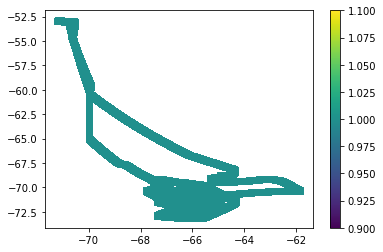

In [189]:
plt.scatter(grav['LONG'], grav['LAT'], c=np.round(fill_nan(grav['test3'])), marker='s')
plt.colorbar()

## ADMAP

In [161]:
basedir = '/Users/dporter/Documents/data_local/'
datadir = 'Antarctica/Geophysical/ADMAP/'

# suffix = '.dat'
# pattern = os.path.join(basedir, datadir, 'ant_new*' + suffix)

suffix = '.llz'
pattern = os.path.join(basedir, datadir, 'ADMAP_ORSTEDcombined' + suffix)

filenames = sorted(glob(pattern))  # , key=alphanum_key)
print filenames

admap = pd.read_csv(filenames[0], delimiter=r"\s+", names=('lat','lon','s'), header=None)
admap.head()

['/Users/dporter/Documents/data_local/Antarctica/Geophysical/ADMAP/ADMAP_ORSTEDcombined.llz']


,lat,lon,s
0,-61.01263,-90.00000,81.7168
1,-61.01673,-94.35863,96.8630
2,-61.02302,-94.18492,95.6766
3,-61.02905,-94.01113,94.6208
4,-61.03483,-93.83726,94.4395


In [162]:
def get_closest_ADMAP_cell(file_for_latlon, lat, lon):
    """
    SSIA
    :param file_for_latlon:
    :param lat:
    :param lon:
    :return:
    """
    LAT = file_for_latlon['lat'][:]
    LON = file_for_latlon['lon'][:]
#     print('lat,lon', lat,lon)
#     a = abs(LON - lon)
#     print(a.min())
#     print('Closest lat,lon', LAT[a.argmin()], LON[a.argmin()])
    
#     a = abs(LAT - lat)
#     print(a.min())
#     print('Closest lat,lon', LAT[a.argmin()], LON[a.argmin()])
    
#     a = abs(LON - lon) + abs(LAT - lat)
#     print(a.min())
#     print('Closest lat,lon', LAT[a.argmin()], LON[a.argmin()])
    return (abs(LON - lon) + abs(LAT - lat)).argmin()

    return (abs(LON - lon) + abs(LAT - lat)).argmin()

get_closest_ADMAP_cell(admap, grav['LAT'][0], grav['LONG'][0])

2911

In [163]:
import time
start_sample = time.time()

grav['test2'] =  np.nan
# test2 = np.full([grav.shape[0], ], np.nan)
# lat_sample = np.full([grav.shape[0], ], np.nan)
# lon_sample = np.full([grav.shape[0], ], np.nan)
admap_sub = admap[grav['LONG'].max()+360 > admap['lon']+360][grav['LONG'].min()+360 < admap['lon']+360][grav['LAT'].max() > admap['lat']][grav['LAT'].min() < admap['lat']].describe()


for i in range(0, grav.shape[0], 500):
# for i in range(0, 30000, 50):
#     ii = get_closest_ADMAP_cell(admap, grav['LAT'][i], grav['LONG'][i])
    ii = (abs(admap_sub['lon'][:] - grav['LONG'][i]) + abs(admap_sub['lat'][:] - grav['LAT'][i])).argmin()
#     print('ii: {}\njj: {}'.format(ii, jj))
#     lat_sample[i/50] = admap['lat'][ii]
#     lon_sample[i/50] = admap['lon'][ii]
#     print(lat_sample[i])
#     test[i] = ds['bouguer_anomaly'].isel(x=jj, y=ii).values
    grav['test2'].iloc[i] = admap_sub['s'][ii]
    
end_sample = time.time()
print('Sampling took {} sec'.format(end_sample - start_sample))


/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Sampling took 27.730246067 sec


In [160]:
# grav['LAT']

u, indices = np.unique(grav['LAT'], return_index=True)
np.shape(grav['LAT'][indices])
# np.shape(grav['LAT'])

(79716,)

In [118]:
np.shape(admap['lon'])

(969479,)

In [128]:
print(np.shape(admap['lat'][grav['LAT'].max() > admap['lat']][grav['LAT'].min() < admap['lat']]))
lat_sub = admap['lat'][grav['LAT'].max() > admap['lat']][grav['LAT'].min() < admap['lat']]
lat_sub.describe()

(700027,)


count    700027.000000
mean        -65.601109
std           3.617698
min         -73.126600
25%         -68.424400
50%         -65.132500
75%         -62.515100
max         -60.000400
Name: lat, dtype: float64

In [135]:
grav['LONG'].describe()

count    91268.000000
mean       -67.800935
std          2.499773
min        -71.215982
25%        -70.406652
50%        -67.366447
75%        -65.719052
max        -61.829817
Name: LONG, dtype: float64

In [136]:
print(np.shape(admap['lon'][grav['LONG'].max() > admap['lon']][grav['LONG'].min() < admap['lon']]))
lon_sub = admap['lon'][grav['LONG'].max()+360 > admap['lon']+360][grav['LONG'].min()+360 < admap['lon']+360]
lon_sub.describe()

(38142,)


count    38142.000000
mean       -66.528937
std          2.706618
min        -71.215700
25%        -68.873050
50%        -66.529000
75%        -64.185625
max        -61.830100
Name: lon, dtype: float64

In [140]:
admap[grav['LONG'].max()+360 > admap['lon']+360][grav['LONG'].min()+360 < admap['lon']+360][grav['LAT'].max() > admap['lat']][grav['LAT'].min() < admap['lat']].describe()


/Users/dporter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,lat,lon,s
count,26414.000000,26414.000000,26414.000000
mean,-65.898489,-66.532018,-0.324844
std,3.728021,2.705420,105.839510
min,-73.126200,-71.215700,-515.940000
25%,-68.987000,-68.875300,-54.485000
50%,-65.569800,-66.532800,-9.820000
75%,-62.640800,-64.190375,39.897500
max,-60.030100,-61.830100,615.420000


#### Function
Sampling took 28.6072530746 sec (i/500)

Sampling took 308.588253975 sec (i/50)

#### NO FUNCTION:
Sampling took 33.2082509995 sec (i/500)

Sampling took 264.135560036 sec (1/50)

### SUBSET ADMAP FIRST:
Sampling took 24 sec (i/500)

Sampling took 275.727045059 sec (1/50)

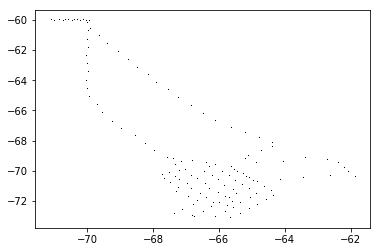

In [78]:
plt.plot(lon_sample, lat_sample, 'k,')

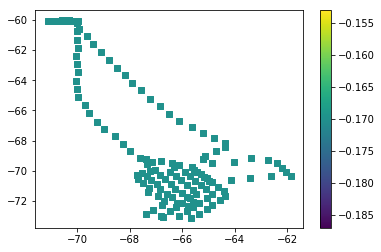

In [75]:
def fill_nan(a):
    from scipy import interpolate
    import numpy.ma as ma
    import numpy as np

    '''
    interpolate to fill nan values
    '''
    b = ma.filled(a, np.nan)
    inds = np.arange(b.shape[0])
    good = np.where(np.isfinite(b))
    f = interpolate.interp1d(inds[good], b[good], bounds_error=False)
    c = np.where(np.isfinite(b), b, f(inds))
    return c

# grav['test2'] = fill_nan(grav['test2'].values)
plt.scatter(lon_sample, lat_sample, c=fill_nan(grav['test2'].values), marker='s')
plt.colorbar()

count    183.000000
mean      40.552678
std       95.819424
min     -122.510000
25%       -1.700000
50%       12.420000
75%       69.520000
max      406.340000
Name: test2, dtype: float64


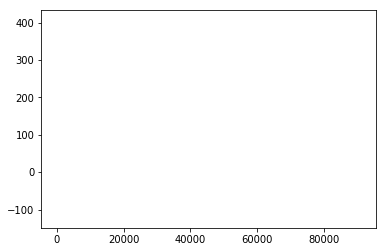

In [84]:
plt.plot(grav['test2'].values)
print(grav['test2'].describe())

# Debug

In [7]:
from shapely import speedups;

assert speedups.available;

speedups.enable()

from shapely.geometry import LineString

ls = LineString([(0, 0), (10, 0)])
# On OSX causes an abort trap, due to https://github.com/Toblerity/Shapely/issues/177 
r = ls.wkt
area = ls.buffer(10).area

In [8]:
area

513.6548490545939